<a href="https://colab.research.google.com/github/rahuld2485/PRODIGY_DS_03/blob/main/twitter_entity_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn nltk wordcloud


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
data = pd.read_csv('twitter_training.csv')

In [18]:
print(data.info())
print(data["Positive"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


<ipython-input-20-2cf1e405f6ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Positive', data=data, palette='coolwarm')


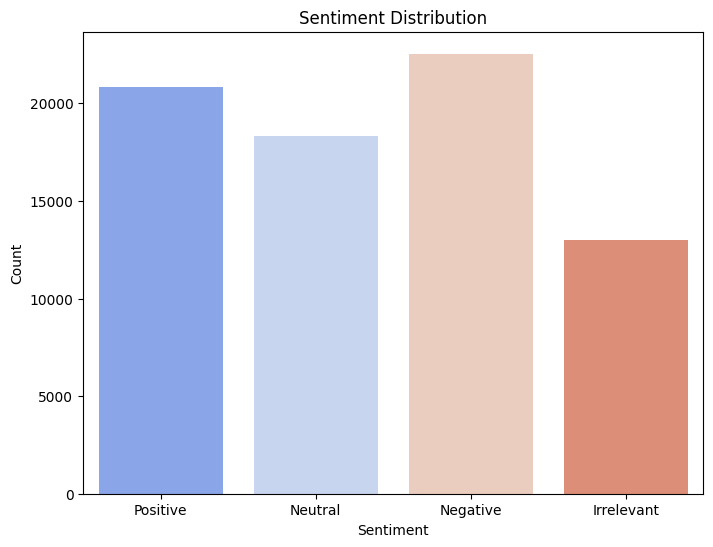

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Positive', data=data, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [38]:
def plot_wordcloud(sentiment):
    text = " ".join(data[data['Positive'] == sentiment]['im getting on borderlands and i will murder you all ,'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
data['vader_score'] = data['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
data['vader_sentiment'] = data['vader_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
print(data[['text', 'vader_sentiment']].head())

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=data, palette='viridis')
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
data.to_csv('processed_sentiment_data.csv', index=False)